# Fake News Detection

## Importing required library

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [62]:
df_fake["class"] = 0
df_true["class"] = 1

In [63]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [64]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [65]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

## Merging Fake news and true news

In [66]:
df = pd.concat([df_fake, df_true], axis =0 )
df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [67]:
df.columns

In [ ]:
df = df.drop(["title", "subject","date"], axis = 1)

In [ ]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1


In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

## Randomly shuffling the df

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df

,text,class
12594,Amid the tumult of the 2016 presidential campa...,0
1112,Trump and his minions and cronies twist realit...,0
16283,A tweet from conservative media icon Matt Drud...,0
2566,Donald Trump s most recent secretive actions t...,0
4694,(Reuters) - Highlights of the day for U.S. Pre...,1
...,...,...
17544,In a last-minute attempt to create a legacy fo...,0
20277,Bad timing This is not great news for the Blac...,0
8231,PHILADELPHIA (Reuters) - U.S. Republican presi...,1
22766,IMAGE: Real-life battlefield shooting range in...,0


## Check Duplicates

In [ ]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape

(38353, 2)

## Checking Missing values


In [ ]:
# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

text     0
class    0
dtype: int64

Number of Fake news :  23471
Number of True news  :  21407


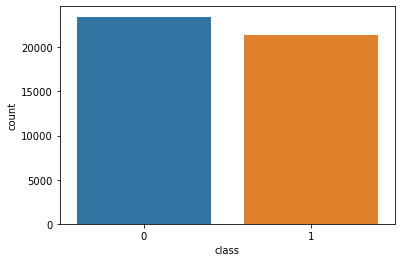

## Reset the index

In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df

,text,class
0,Amid the tumult of the 2016 presidential campa...,0
1,Trump and his minions and cronies twist realit...,0
2,A tweet from conservative media icon Matt Drud...,0
3,Donald Trump s most recent secretive actions t...,0
4,(Reuters) - Highlights of the day for U.S. Pre...,1
...,...,...
44873,In a last-minute attempt to create a legacy fo...,0
44874,Bad timing This is not great news for the Blac...,0
44875,PHILADELPHIA (Reuters) - U.S. Republican presi...,1
44876,IMAGE: Real-life battlefield shooting range in...,0


In [ ]:
print("Number of Fake news : " ,df[df['class'] == 0].shape[0])
print("Number of True news  : ",df[df['class'] == 1].shape[0])


sns.countplot(x = 'class' , data = df)
plt.show()

## Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

In [ ]:
df

,text,class
0,amid the tumult of the presidential campaign ...,0
1,trump and his minions and cronies twist realit...,0
2,a tweet from conservative media icon matt drud...,0
3,donald trump s most recent secretive actions t...,0
4,reuters highlights of the day for u s pre...,1
...,...,...
44873,in a last minute attempt to create a legacy fo...,0
44874,bad timing this is not great news for the blac...,0
44875,philadelphia reuters u s republican presi...,1
44876,image real life battlefield shooting range in...,0


### Defining dependent and independent variable as x and y

In [ ]:
x = df["text"]
y = df["class"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
x_train

14426    it s easy to think the whole brouhaha with mic...
42643    donald trump is making a key speech on the eco...
19013    john and melissa wood are typical right wing l...
13842    beirut  reuters    the syrian observatory for ...
34548    moscow  reuters    the kremlin said on friday ...
                               ...                        
2262     london  reuters    formula one s new owners li...
37570    caracas san cristobal  venezuela  reuters    w...
37735    once again  a great opening statement from jud...
5353     this is the best yet  a message to hollywood t...
11794    donald trump has been nothing but a disaster s...
Name: text, Length: 33658, dtype: object

In [ ]:
y_train

14426    0
42643    0
19013    0
13842    1
34548    1
        ..
2262     1
37570    1
37735    0
5353     0
11794    0
Name: class, Length: 33658, dtype: int64

## Converting text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
print(xv_test)

  (0, 94185)	0.007338698390548489
  (0, 94159)	0.03293453003596185
  (0, 93916)	0.05159921356087955
  (0, 93904)	0.06126340226288239
  (0, 93197)	0.047884483245732086
  (0, 93138)	0.00980457432815349
  (0, 92810)	0.021403758339991558
  (0, 92805)	0.012703232823218186
  (0, 92785)	0.04904157695171941
  (0, 92600)	0.02457228683578944
  (0, 92246)	0.010646273327734365
  (0, 92111)	0.02416672067028825
  (0, 92106)	0.01880135280121499
  (0, 92089)	0.024691440344142564
  (0, 92081)	0.006653941687715722
  (0, 91862)	0.019712446861423517
  (0, 91790)	0.045998435964932916
  (0, 91532)	0.0194639709320104
  (0, 91531)	0.028071603284728644
  (0, 91439)	0.01829469509460284
  (0, 91260)	0.009512333124844861
  (0, 91012)	0.01364091282526388
  (0, 90593)	0.0236790114450508
  (0, 90374)	0.019866416739613545
  (0, 90171)	0.014453949741524256
  :	:
  (11219, 6602)	0.0580673180306716
  (11219, 6488)	0.0812097618501021
  (11219, 6478)	0.09553071409372968
  (11219, 6419)	0.07860128709994842
  (11219, 5962)	

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9860071301247771

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5889
           1       0.98      0.99      0.99      5331

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9958110516934047

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5889
           1       1.00      1.00      1.00      5331

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9945632798573975

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5889
           1       0.99      1.00      0.99      5331

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9910873440285205

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5889
           1       0.99      0.99      0.99      5331

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220

